<a href="https://colab.research.google.com/github/nandhinithangavel-21/phase3/blob/main/Perdicting_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Step 2: Load the data
df = pd.read_csv('customer_churn_data.csv')
print(df)

    CustomerID  Age  Gender  Tenure  MonthlySpend SubscriptionType  Churn
0            1   56    Male       4           301            Basic      0
1            2   69    Male      11           193            Basic      1
2            3   46    Male      10           395            Basic      0
3            4   32    Male       7           161            Basic      1
4            5   60    Male       9           109          Premium      0
..         ...  ...     ...     ...           ...              ...    ...
95          96   42  Female       2           207              VIP      1
96          97   62  Female       7            95              VIP      1
97          98   58  Female      10           422          Premium      0
98          99   46  Female       3            55              VIP      1
99         100   32  Female       7           148          Premium      0

[100 rows x 7 columns]


In [ ]:
# Step 3: Exploratory Data Analysis (EDA)

# Check the first few rows of the dataset
print(df.head())



   CustomerID  Age Gender  Tenure  MonthlySpend SubscriptionType  Churn
0           1   56   Male       4           301            Basic      0
1           2   69   Male      11           193            Basic      1
2           3   46   Male      10           395            Basic      0
3           4   32   Male       7           161            Basic      1
4           5   60   Male       9           109          Premium      0


In [ ]:
# Check for missing values
print(df.isnull().sum())



CustomerID          0
Age                 0
Gender              0
Tenure              0
MonthlySpend        0
SubscriptionType    0
Churn               0
dtype: int64


In [ ]:
# Basic statistics
print(df.describe())

       CustomerID         Age     Tenure  MonthlySpend       Churn
count  100.000000  100.000000  100.00000    100.000000  100.000000
mean    50.500000   43.350000    5.81000    268.300000    0.560000
std     29.011492   14.904663    3.35356    131.891178    0.498888
min      1.000000   19.000000    1.00000     51.000000    0.000000
25%     25.750000   31.750000    3.00000    161.750000    0.000000
50%     50.500000   42.000000    6.00000    257.000000    1.000000
75%     75.250000   57.000000    9.00000    390.500000    1.000000
max    100.000000   69.000000   11.00000    497.000000    1.000000


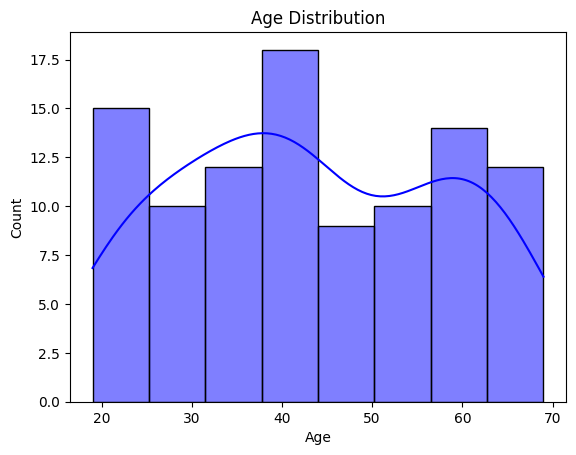

In [ ]:
# Visualize the distribution of 'Age' and 'MonthlySpend'
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.show()



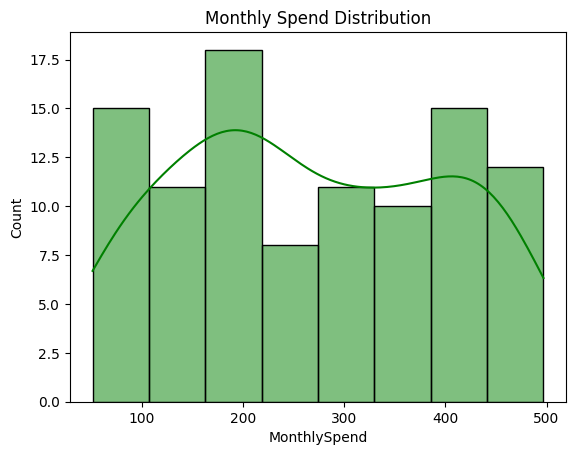

In [ ]:
sns.histplot(df['MonthlySpend'], kde=True, color='green')
plt.title('Monthly Spend Distribution')
plt.show()

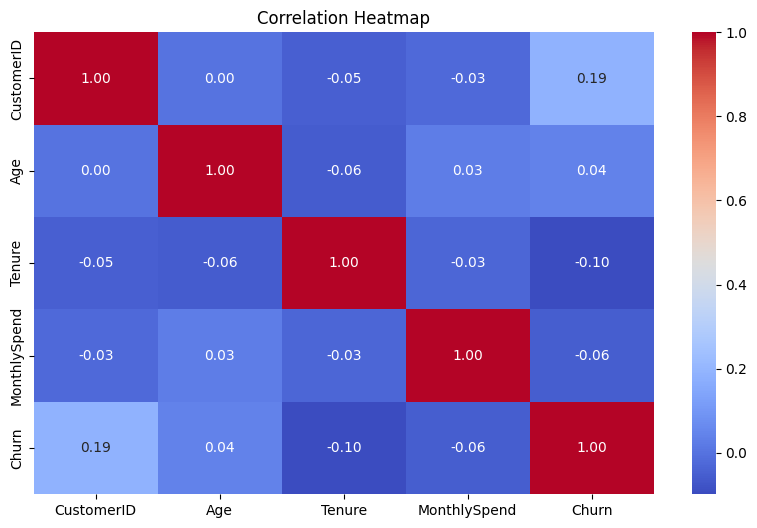

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Heatmap to visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


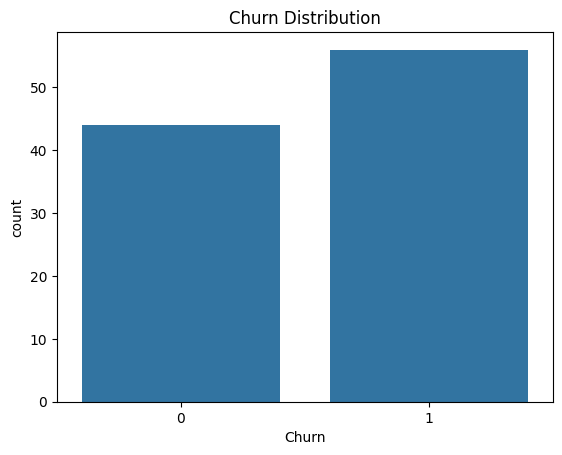

In [ ]:
# Visualizing churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [ ]:
# Step 4: Data Preprocessing

# Encode categorical features (Gender and SubscriptionType)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['SubscriptionType'] = label_encoder.fit_transform(df['SubscriptionType'])
print(df)

    CustomerID  Age  Gender  Tenure  MonthlySpend  SubscriptionType  Churn
0            1   56       1       4           301                 0      0
1            2   69       1      11           193                 0      1
2            3   46       1      10           395                 0      0
3            4   32       1       7           161                 0      1
4            5   60       1       9           109                 1      0
..         ...  ...     ...     ...           ...               ...    ...
95          96   42       0       2           207                 2      1
96          97   62       0       7            95                 2      1
97          98   58       0      10           422                 1      0
98          99   46       0       3            55                 2      1
99         100   32       0       7           148                 1      0

[100 rows x 7 columns]


In [ ]:
# Step 5: Feature Engineering and Splitting the Data

# Define features (X) and target variable (y)
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits to verify the sizes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

#


Shape of X_train: (80, 5)
Shape of X_test: (20, 5)
Shape of y_train: (80,)
Shape of y_test: (20,)


In [ ]:
# Step 6: Model Selection and Training

# Initialize RandomForestClassifier (you can try other models too)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 7: Model Evaluation

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.64      0.82      0.72        11

    accuracy                           0.65        20
   macro avg       0.65      0.63      0.63        20
weighted avg       0.65      0.65      0.64        20

Confusion Matrix:
 [[4 5]
 [2 9]]


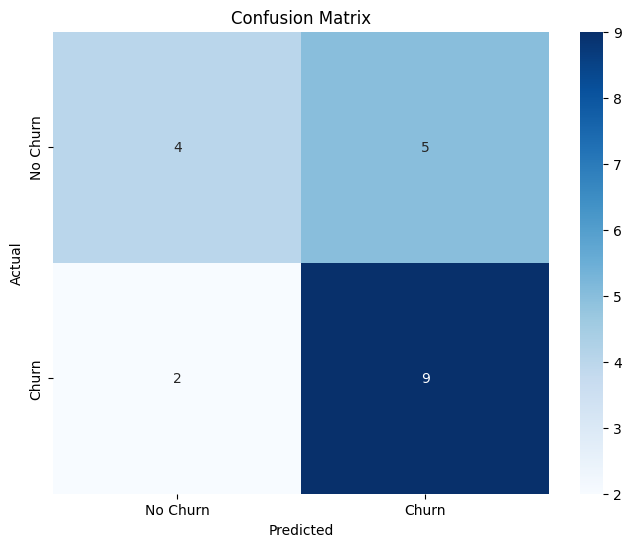

In [ ]:
# Step 8: Visualization of the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# New customer data for prediction
new_customer = pd.DataFrame({
    'Age': [30],
    'Gender': [0],          # 0 represents 'Male' if that was the encoding during training
    'Tenure': [3],
    'MonthlySpend': [150],
    'SubscriptionType': [0] # 0 represents 'Basic' if that was the encoding during training
})

# Predict churn
prediction = model.predict(new_customer)
print("New Customer Churn Prediction:", "Churned" if prediction[0] == 1 else "Not Churned")


New Customer Churn Prediction: Churned


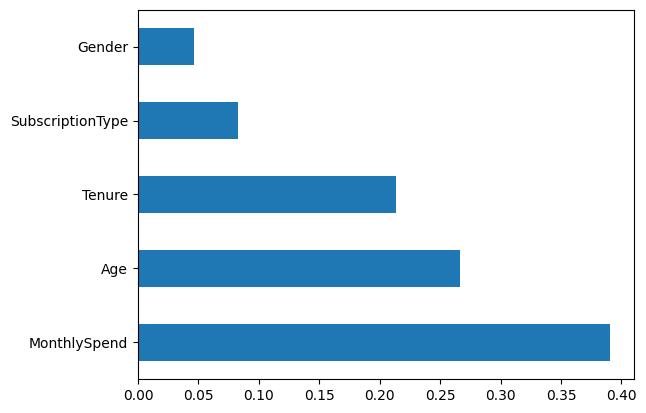

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()


In [ ]:
import joblib
joblib.dump(model, 'churn_model.pkl')


['churn_model.pkl']

In [ ]:
import joblib
joblib.dump(model, 'churn_model.pkl')
print("✅ Model saved as churn_model.pkl")


✅ Model saved as churn_model.pkl
